# MTH5001 Introduction to Computer Programming - Lab 7
Dr Lucas Lacasa and Prof. Thomas Prellberg

## Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1: Convergence of root-finding algorithms

In the lecture we showed that the root finding algorithms converge at different rates. In particular, we showed that the error $\epsilon_n$ after $n$ iterations behaves as $$|\epsilon_{n+1}|\approx C|\epsilon_n|^p$$
with $$p=\begin{cases}1&\text{Bisection method}\\ 1.618&\text{Secant method}\\2&\text{Newton method}\end{cases}$$

We shall now test this numerically by producing two different plots.

1. a double-logarithmic plot of $|\epsilon_{n+1}|$ versus $|\epsilon_n|$. We should see points that lie on a straight line with slope given by the exponent).
2. a semi-logarithmic plot of $|\epsilon_n|$ versus $n$. What do you expect to see?

In the lecture, you were given the code for the bisection algorithm. Here, we will use a very simplified version.

In [2]:
def bisection(f,a,b,N):
    for n in range(N):
        m=(a+b)/2
        if f(a)*f(m)<0:
            b=m
        else:
            a=m
    return (a+b)/2

To show how the error decreases, we compute the root of $f(x)=\cos x-x$ with the bisection algorithm starting with $x_0=0$ and $x_1=\pi/2$ ($f(0)=1$ and $f(\pi/2)=-\pi/2$ ensures that the algorithm will find the root).

As we are interested in the error, we need the root and compute it numerically by iterating sufficiently often.

In [3]:
root=bisection(lambda x: np.cos(x)-x,0,np.pi/2,100)
print(root)

0.7390851332151607


We now create a list containing the list of the logarithms of the absolute values of the error, i.e. a list $\log|\epsilon_n|$, where $\epsilon_n=x_n-a$ (with $a$ being the root of the function $f$, i.e. $f(a)=0$):

In [4]:
logeps=[np.log(abs(0-root)),np.log(abs(np.pi/2-root))]
for n in range(50):
    x_new=bisection(lambda x: np.cos(x)-x,0,np.pi/2,n)
    logeps.append(np.log(abs(x_new-root)))

When plotting $\log|\epsilon_{n+1}|$ versus $\log|\epsilon_n|$, we see a straight line with slope 1 as expected.

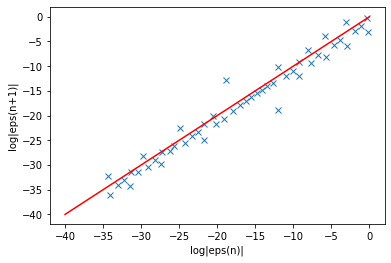

In [5]:
plt.plot(logeps[:-1],logeps[1:],'x')
plt.plot([-40,0],[-40,0],'r')
plt.xlabel('log|eps(n)|')
plt.ylabel('log|eps(n+1)|')
plt.show()

Correspondingly, the error decreases as a function of the number of iterations as shown in the graph below.

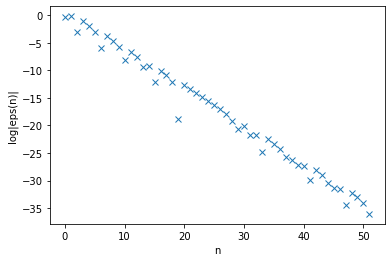

In [6]:
plt.plot(logeps,'x')
plt.xlabel('n')
plt.ylabel('log|eps(n)|')
plt.show()

#### Exercise 1.a.: Produce corresponding plots for the secant and Newton method (starting with $x_0=0$ for the Newton method). Compare convergence rates.

#### Exercise 1.b.: Repeat 1.a. for two other functions of your choice, i.e. replace the function $f(x)=\cos(x)-x$ by some other functions. If you are unsure about roots, try plotting the graph of your functions first.

### Optional Exercise 2.: Producing pictures.

To create images pixel by pixel, we will simply import a module and use it as a black box. Study the following code (and note the US spelling of color).

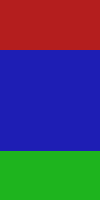

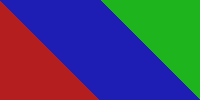

In [7]:
# import some picture stuff
from PIL import Image
from IPython.core.display import display

# define some colors using RGB notation (red, green, blue) with color values from 0 to 255
colors = [(180, 30, 30), (30, 180, 30), (30, 30, 180)]

# create an image of size 100x200 to manipulate
img=Image.new("RGB", (100,200))

# color all the pixels
for j in range(200):
        for i in range(100):
            if j<50:
                img.putpixel((i,j),colors[0])
            elif j>150:
                img.putpixel((i,j),colors[1])
            else:
                img.putpixel((i,j),colors[2])
            
# and display the picture
display(img)

# create an image of size 200x100 to manipulate
img=Image.new("RGB", (200,100))

# color all the pixels
for i in range(200):
        for j in range(100):
            if i<j:
                img.putpixel((i,j),colors[0])
            elif i>j+100:
                img.putpixel((i,j),colors[1])
            else:
                img.putpixel((i,j),colors[2])
            
# and display the picture
display(img)


If you understand the code above, you should find the next two exercises fairly easy. To draw a circle, you can use $(x-x_0)^2+(y-y_0)^2<r^2$, and to draw a square, you can use $\max(|x-x_0|,|y-y_0|)<d$ with suitable values of $x_0$, $y_0$, $r$ and $a$.

#### Exercise 2.1.: Draw a square shaped picture of a blue circle inside a green background.

#### Exercise 2.2.: Draw a square shaped picture of a yellow square inside a red background.

### Optional Exercise 3.: Complex Newton Iteration

For the remainder of this tutorial, you should have fun creating some [fractals](https://en.wikipedia.org/wiki/Fractal). Lets consider the function $f(z)=z^3-1$. It has roots at $z=1$ and $z=\frac12(-1\pm i\sqrt{3})$:

In [8]:
roots=[1,complex(-1/2,3*(1/2)/2),complex(-1/2,-3**(1/2)/2)]

For any complex number, we can identify which of these roots it is closest to as follows.

In [9]:
def index(z):
    j=0
    dist=abs(z-roots[0])
    for i in range(1,len(roots)):
        # check if $z$ is closer to other root
        if abs(z-roots[i])<dist:
            dist=abs(z-roots[i])
            j=i
    return j      

Lets test this. We want to map pixels $(i,j)$ to a complex number in the grid we want to plot, say a square of sidelength 2 centered about the origin.

In [10]:
def z(i,j,size):
    return complex(-1+2*i/size,-1+2*j/size)

Finally we can create the picture.

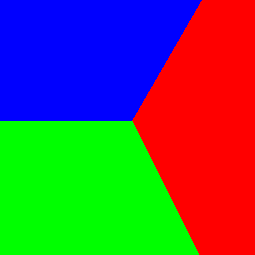

In [11]:
size=255

# create an image to manipulate
img=Image.new("RGB", (size,size))

# define some colors using RGB notation (red, green, blue)
colors = [(255,0,0), (0,255,0), (0,0,255)]

# color all the pixels
for j in range(size):
    for i in range(size):
        img.putpixel((i,j),colors[index(z(i,j,size))])
    
# and display the picture
display(img)

You see the points closest to $1$ are red, the points closest to $
\frac12(-1-i\sqrt3)$ are green, and the points closest to $\frac12(-1+i\sqrt3)$ are blue. Do make sure you understand this!

Now for the fun bit, and over to you. Recall from the lecture on root finding that `newton()` takes as arguments a function, its derivative, a starting value, and the number of iterations.

In [12]:
def newton(f,df,a,N):
    for n in range(N):
        a=a-f(a)/df(a)
    return a

f=lambda z: z**3-1
df=lambda z: 3*z**2

#### Exercise 3.1.: Create a picture of the points that after one Newton iteration for $f(z)=z^3-1$ are closest to the roots of this polynomial.

#### Exercise 3.2.: Now create similar pictures for more iterations. Write a function `draw(size,iterations)` for this task, and run
```python
draw(255,0)
draw(255,1)
draw(255,2)
draw(255,3)
draw(255,4)
```
You should see a hierarchical fractal structure emerging. 

#### Exercise 3.3.: Lets finish with creating a larger picture and more iterations, using
```python
draw(501,100)
```
This should look like the picture in the lecture notes.

If you are intrigued by this, you may want to search online for more examples of using Python to display fractal structures, such as this randomly selected [example](http://0pointer.de/blog/projects/mandelbrot.html).

## Submit your Jupyter Notebook to QMPLUS

Once you are done, save the jupyter notebook and submit it to QMPLUS under Lab Report Week 7.